In [33]:
import pandas as pd
import numpy as np
from plotnine import *
%matplotlib inline


advs = pd.read_sas("./ADaM/advs.xpt")


In [19]:
advs1 = advs.loc[(advs["ANL01FL"] == b"Y") & (advs["PARAM"] == b'Diastolic Blood Pressure (mmHg)')]
gg = advs1.groupby(["TRTPN","TRTP","AVISITN","AVISIT"])

In [20]:
advs1.head()


,STUDYID,SITEID,USUBJID,AGE,AGEGR1,AGEGR1N,RACE,RACEN,SEX,SAFFL,...,AVAL,BASE,BASETYPE,CHG,PCHG,VISITNUM,VISIT,VSSEQ,ANL01FL,ABLFL
2,b'CDISCPILOT01',b'701',b'01-701-1015',63.0,b'<65',1.0,b'WHITE',1.0,b'F',b'Y',...,56.0,56.0,b'AFTER LYING DOWN FOR 5 MINUTES',5.397605e-79,5.397605e-79,3.0,b'BASELINE',7.0,b'Y',b'Y'
4,b'CDISCPILOT01',b'701',b'01-701-1015',63.0,b'<65',1.0,b'WHITE',1.0,b'F',b'Y',...,56.0,56.0,b'AFTER LYING DOWN FOR 5 MINUTES',5.397605e-79,5.397605e-79,4.0,b'WEEK 2',13.0,b'Y',b''
5,b'CDISCPILOT01',b'701',b'01-701-1015',63.0,b'<65',1.0,b'WHITE',1.0,b'F',b'Y',...,64.0,56.0,b'AFTER LYING DOWN FOR 5 MINUTES',8.000000e+00,1.428571e+01,5.0,b'WEEK 4',16.0,b'Y',b''
7,b'CDISCPILOT01',b'701',b'01-701-1015',63.0,b'<65',1.0,b'WHITE',1.0,b'F',b'Y',...,55.0,56.0,b'AFTER LYING DOWN FOR 5 MINUTES',-1.000000e+00,-1.785714e+00,7.0,b'WEEK 6',22.0,b'Y',b''
8,b'CDISCPILOT01',b'701',b'01-701-1015',63.0,b'<65',1.0,b'WHITE',1.0,b'F',b'Y',...,67.0,56.0,b'AFTER LYING DOWN FOR 5 MINUTES',1.100000e+01,1.964286e+01,8.0,b'WEEK 8',25.0,b'Y',b''


In [21]:
gg["PARAM"].value_counts()

TRTPN         TRTP                     AVISITN       AVISIT               PARAM                             
5.397605e-79  b'Placebo'               5.397605e-79  b'Baseline'          b'Diastolic Blood Pressure (mmHg)'    255
                                       2.000000e+00  b'Week 2'            b'Diastolic Blood Pressure (mmHg)'    252
                                       4.000000e+00  b'Week 4'            b'Diastolic Blood Pressure (mmHg)'    246
                                       6.000000e+00  b'Week 6'            b'Diastolic Blood Pressure (mmHg)'    228
                                       8.000000e+00  b'Week 8'            b'Diastolic Blood Pressure (mmHg)'    219
                                       1.200000e+01  b'Week 12'           b'Diastolic Blood Pressure (mmHg)'    207
                                       1.600000e+01  b'Week 16'           b'Diastolic Blood Pressure (mmHg)'    204
                                       2.000000e+01  b'Week 20'           b'Dia

In [23]:
sum = gg["AVAL"].agg({"Mean":"mean","SE":"sem"})

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [26]:
sum.reset_index()
sum.sort_values(by=["AVISITN","AVISIT","TRTPN","TRTP"])

,,,,Mean,SE
TRTPN,TRTP,AVISITN,AVISIT,,
5.397605e-79,b'Placebo',5.397605e-79,b'Baseline',77.094118,0.683195
5.400000e+01,b'Xanomeline Low Dose',5.397605e-79,b'Baseline',76.357143,0.645753
8.100000e+01,b'Xanomeline High Dose',5.397605e-79,b'Baseline',78.265873,0.646967
5.397605e-79,b'Placebo',2.000000e+00,b'Week 2',74.456349,0.656637
5.400000e+01,b'Xanomeline Low Dose',2.000000e+00,b'Week 2',76.219124,0.624276
8.100000e+01,b'Xanomeline High Dose',2.000000e+00,b'Week 2',76.427984,0.691378
5.397605e-79,b'Placebo',4.000000e+00,b'Week 4',75.430894,0.730596
5.400000e+01,b'Xanomeline Low Dose',4.000000e+00,b'Week 4',76.004630,0.636105
8.100000e+01,b'Xanomeline High Dose',4.000000e+00,b'Week 4',76.799087,0.647355


In [86]:
sum.reset_index(inplace=True)
sum["ybar_upper"] = sum["Mean"] + sum["SE"]
sum["ybar_lower"] = sum["Mean"] - sum["SE"]

In [87]:
list(sum)

['index',
 'TRTPN',
 'TRTP',
 'AVISITN',
 'AVISIT',
 'Mean',
 'SE',
 'ybar_upper',
 'ybar_lower']

In [88]:
sum

,index,TRTPN,TRTP,AVISITN,AVISIT,Mean,SE,ybar_upper,ybar_lower
0,0,5.397605e-79,b'Placebo',5.397605e-79,b'Baseline',77.094118,0.683195,77.777313,76.410923
1,1,5.397605e-79,b'Placebo',2.000000e+00,b'Week 2',74.456349,0.656637,75.112986,73.799712
2,2,5.397605e-79,b'Placebo',4.000000e+00,b'Week 4',75.430894,0.730596,76.161490,74.700299
3,3,5.397605e-79,b'Placebo',6.000000e+00,b'Week 6',74.482456,0.675795,75.158251,73.806661
4,4,5.397605e-79,b'Placebo',8.000000e+00,b'Week 8',75.246575,0.627666,75.874242,74.618909
5,5,5.397605e-79,b'Placebo',1.200000e+01,b'Week 12',74.289855,0.758959,75.048814,73.530896
6,6,5.397605e-79,b'Placebo',1.600000e+01,b'Week 16',75.117647,0.777397,75.895044,74.340250
7,7,5.397605e-79,b'Placebo',2.000000e+01,b'Week 20',73.398990,0.751718,74.150707,72.647272
8,8,5.397605e-79,b'Placebo',2.400000e+01,b'Week 24',73.796610,0.889480,74.686090,72.907130
9,9,5.397605e-79,b'Placebo',2.600000e+01,b'Week 26',72.632184,0.829744,73.461928,71.802440


In [75]:
avisitn = advs["AVISITN"].value_counts().reset_index(name="counts")
list(avisitn)
type(avisitn)
avisitn.sort_values(by=["index"])
avisitn_sorted = avisitn["index"].tolist()

In [76]:
avisitn_sorted

[5.397605346934028e-79, 2.0, 99.0, 4.0, 6.0, 8.0, 12.0, 16.0, 20.0, 24.0, 26.0]

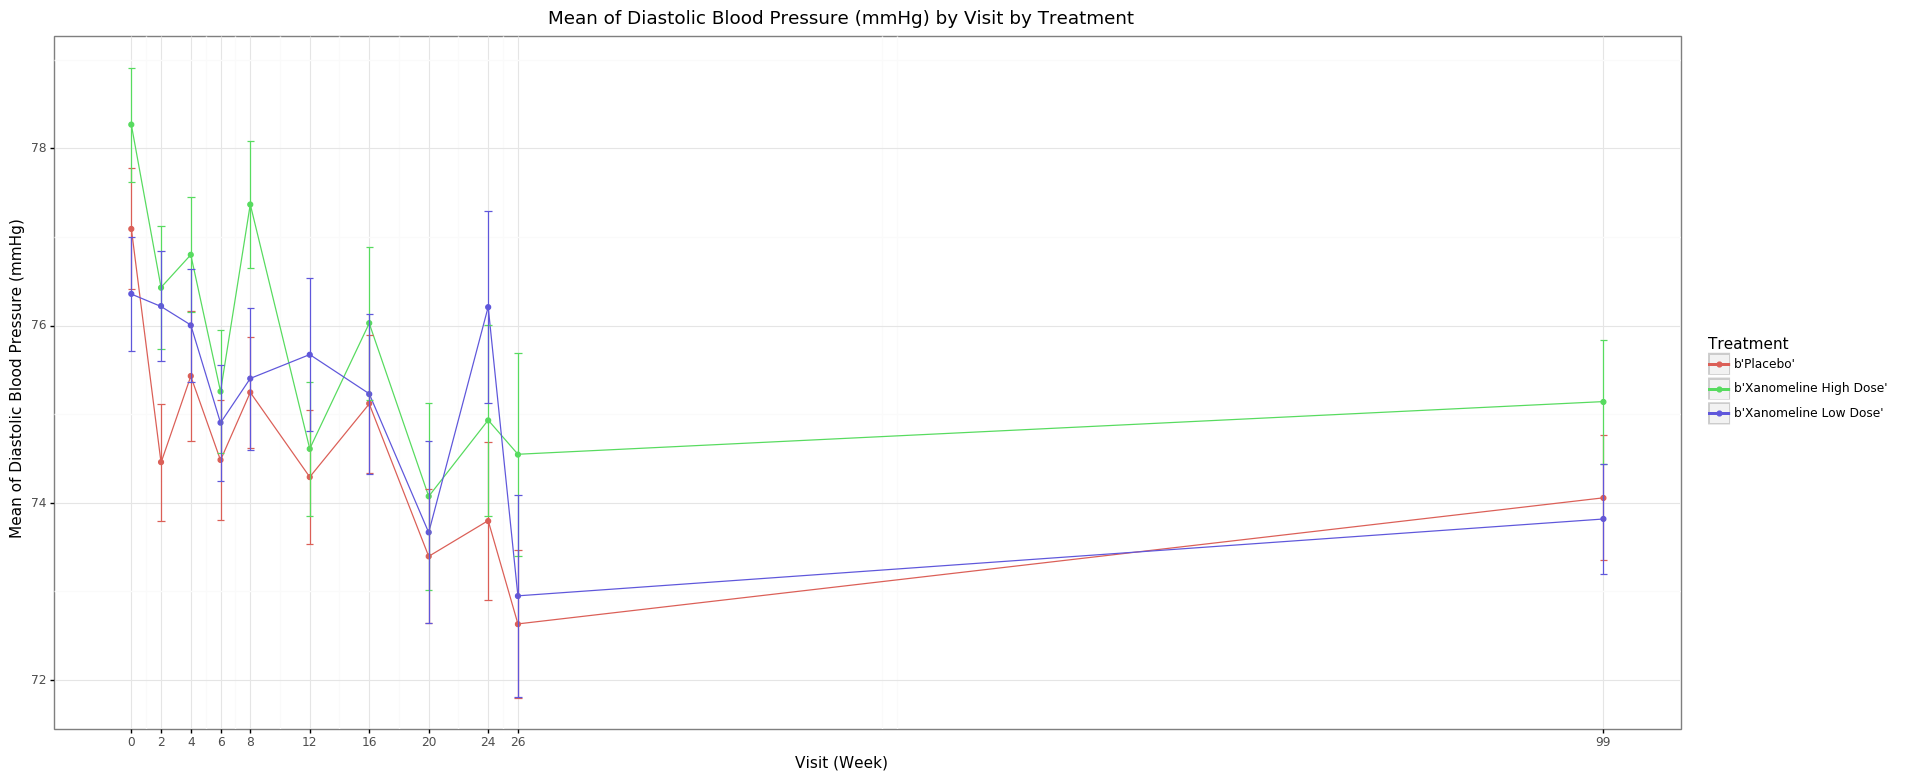

<ggplot: (-9223363248806929846)>

In [94]:
(ggplot(sum, aes("AVISITN","Mean",color="factor(TRTP)"))
 + geom_point(position="jitter")
 + geom_line(position="jitter")
 + geom_errorbar(aes(ymin="ybar_lower",ymax="ybar_upper"))
 + xlab("Visit (Week)")
 + ylab("Mean of Diastolic Blood Pressure (mmHg)")
 + ggtitle("Mean of Diastolic Blood Pressure (mmHg) by Visit by Treatment")
 + scale_x_continuous(breaks=avisitn_sorted)
 + theme_bw()
 + labs(color="Treatment")
 + theme(legend_position="right",figure_size=(21,9))
)

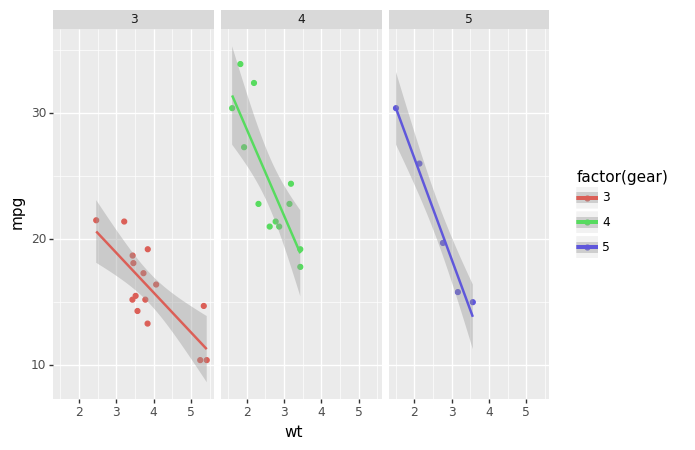

<ggplot: (8788047895423)>

In [91]:
# mtcars = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv", index_col=0)
import plotnine.data

(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear'))